In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from functions_parameters.universal_parameters import a, b
from functions_parameters.tools import rot_symm_m_check_d, translation_check_d, array_print
from itertools import product

In [2]:
final_result = np.load('schf_fixed_u_filling_vhs_t_4_em4_random_basis_mesh_30_2_2_pmap_over_v1_v2.npz')


final_ground_state_e_diff_density = final_result['gse']
final_density = final_result['d']
final_bond = final_result['bond']
final_e_difference = final_result['e_diff']
final_c_difference = final_result['c_diff']
final_e_fermi = final_result['e_fermi']
final_iteration = final_result['iters']
any_bi_fail = final_result['any_bi_fail']

v1_arr = final_result['v1']
v2_arr = final_result['v2']
v1_mesh, v2_mesh = np.meshgrid(v1_arr, v2_arr, indexing = 'ij')

In [3]:
np.max(final_c_difference)

np.float64(0.46565799780366696)

In [4]:
np.max(final_e_difference)

np.float64(0.0010287515268836422)

In [5]:
np.all(np.logical_not(any_bi_fail))

np.True_

### Some points do not converge

In [6]:
index_c_diff = np.where(np.abs(final_c_difference)>1E-4)
final_ground_state_e_diff_density[index_c_diff] = 0
index_e_diff = np.where(np.abs(final_e_difference)>1E-4)
final_ground_state_e_diff_density[index_e_diff] = 0

In [7]:
index_c_diff

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
         6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 

In [8]:
final_c_difference[index_c_diff]

array([2.48725469e-01, 2.48725469e-01, 2.48725469e-01, 2.48725469e-01,
       2.48725469e-01, 2.48725469e-01, 1.49914161e-01, 2.34823615e-01,
       2.34823615e-01, 2.34823615e-01, 2.34823615e-01, 2.34823615e-01,
       2.34823615e-01, 2.09011168e-01, 2.09011168e-01, 2.09011168e-01,
       2.09011168e-01, 2.09011168e-01, 2.09011168e-01, 1.01219756e-01,
       1.01219756e-01, 1.01219756e-01, 1.01219756e-01, 1.01219756e-01,
       1.01219756e-01, 1.20166533e-01, 1.20166533e-01, 1.37766027e-01,
       1.37766027e-01, 1.37766027e-01, 1.52375174e-01, 1.52375174e-01,
       1.52375174e-01, 1.52375174e-01, 1.64389898e-01, 1.64389898e-01,
       1.64389898e-01, 1.74226343e-01, 2.28360761e-01, 2.28360761e-01,
       2.28360761e-01, 2.28360761e-01, 2.28360761e-01, 2.28360761e-01,
       1.80015351e-01, 1.80015351e-01, 1.80015351e-01, 1.80015351e-01,
       1.80015351e-01, 1.80015351e-01, 8.35953449e-02, 8.35953449e-02,
       8.35953449e-02, 8.35953449e-02, 8.35953449e-02, 8.35953449e-02,
      

### Phase Analysis

In [9]:
translation_a1 = np.kron(np.array([[0,0,1,0],
                           [0,0,0,1],
                           [1,0,0,0],
                           [0,1,0,0]]), np.eye(3))
translation_a2 = np.kron(np.array([[0,1,0,0],
                           [1,0,0,0],
                           [0,0,0,1],
                           [0,0,1,0]]), np.eye(3))
translation_a3 = translation_a1 @ translation_a2
c_6_uc = np.array([[0,0,1],
                   [1,0,0],
                   [0,1,0]])
c_3_uc = c_6_uc@c_6_uc
c_2_uc = c_6_uc @ c_3_uc
c_6_2uc = np.zeros((12, 12))
c_6_2uc[0, 2] = 1
c_6_2uc[1, 6] = 1
c_6_2uc[2, 7] = 1
c_6_2uc[3, 8] = 1
c_6_2uc[4, 0] = 1
c_6_2uc[5, 1] = 1
c_6_2uc[6, -1] = 1
c_6_2uc[7, 3] = 1
c_6_2uc[8, 4] = 1
c_6_2uc[9, 5] = 1
c_6_2uc[10, -3] = 1
c_6_2uc[11, -2] = 1

c_6_2uc = np.moveaxis(np.reshape(c_6_2uc, (2, 2, 3, 2, 2, 3)), (0, 3), (1, 4)).reshape(12, 12)
c_3_2uc = c_6_2uc @ c_6_2uc
c_2_2uc = c_3_2uc @ c_6_2uc

In [10]:
# try define a translated rotation symmetry check operator such that we can check if the phase is genuine stripe orders.
c_6_2uc_gamma = np.zeros((12, 12))
c_6_2uc_gamma[1, 0] = 1
c_6_2uc_gamma[2, 1] = 1
c_6_2uc_gamma[6, 2] = 1
c_6_2uc_gamma[7, 3] = 1
c_6_2uc_gamma[8, 4] = 1
c_6_2uc_gamma[0, 5] = 1
c_6_2uc_gamma[10, 6] = 1
c_6_2uc_gamma[11, 7] = 1
c_6_2uc_gamma[3, 8] = 1
c_6_2uc_gamma[4, 9] = 1
c_6_2uc_gamma[5, 10] = 1
c_6_2uc_gamma[9, 11] = 1

In [11]:
c_6_2uc_y=np.zeros((12, 12))
c_6_2uc_y[10, 0] = 1
c_6_2uc_y[11, 1] = 1
c_6_2uc_y[3, 2] = 1
c_6_2uc_y[4, 3] = 1
c_6_2uc_y[5, 4] = 1
c_6_2uc_y[9, 5] = 1
c_6_2uc_y[1, 6] = 1
c_6_2uc_y[2, 7] = 1
c_6_2uc_y[6, 8] = 1
c_6_2uc_y[7, 9] = 1
c_6_2uc_y[8, 10] = 1
c_6_2uc_y[0, 11] = 1

In [12]:
c_6_2uc_x=np.zeros((12, 12))
c_6_2uc_x[4, 0] = 1
c_6_2uc_x[5, 1] = 1
c_6_2uc_x[9, 2] = 1
c_6_2uc_x[10, 3] = 1
c_6_2uc_x[11, 4] = 1
c_6_2uc_x[3, 5] = 1
c_6_2uc_x[7, 6] = 1
c_6_2uc_x[8, 7] = 1
c_6_2uc_x[0, 8] = 1
c_6_2uc_x[1, 9] = 1
c_6_2uc_x[2, 10] = 1
c_6_2uc_x[6, 11] = 1

In [13]:
c_3_2uc_gamma = c_6_2uc_gamma @ c_6_2uc_gamma
c_2_2uc_gamma = c_3_2uc_gamma @ c_6_2uc_gamma
c_3_2uc_x = c_6_2uc_x @ c_6_2uc_x
c_2_2uc_x = c_3_2uc_x @ c_6_2uc_x
c_3_2uc_y = c_6_2uc_y @ c_6_2uc_y
c_2_2uc_y = c_3_2uc_y @ c_6_2uc_y

In [14]:
ts_phase = ['', 'stripe', '2*2']
nematic_phase = [' R symmetric', ' C3 charge nematic', ' C2 charge nematic', ' no R']
Magnetism_phase = [' +', ' FM', ' Ferri', ' AFM']

phase_list_final = list(i+j+m for i,j,m in product(ts_phase, nematic_phase, Magnetism_phase))

In [15]:
sorted_ground_state_e_index = np.argsort(final_ground_state_e_diff_density, axis=2)
sorted_ground_state_e= np.take_along_axis(final_ground_state_e_diff_density, sorted_ground_state_e_index, axis=2)
sorted_density = np.take_along_axis(final_density, sorted_ground_state_e_index[:,:,:,np.newaxis,np.newaxis], axis=2)
sorted_e_difference = np.take_along_axis(final_e_difference, sorted_ground_state_e_index, axis=2)
sorted_c_difference = np.take_along_axis(final_c_difference, sorted_ground_state_e_index, axis=2)

In [16]:
phase_diagram_based_on_d = np.zeros((v1_mesh.shape))

threshold = 1E-2
for i in range(v1_mesh.shape[0]):
    for j in range(v1_mesh.shape[1]):
        d_ij = sorted_density[i,j,0]
        ts_recording = np.zeros((3))
        rs_recording = np.zeros((4))
        m_recording = np.zeros((4))
        ts_diff_arr = translation_check_d(d_ij, translation_a1, translation_a2, translation_a3)
        if np.all(ts_diff_arr<threshold):
            ts_recording[0] = 1
        elif np.all(ts_diff_arr>threshold):
            ts_recording[-1] = 1
        else:
            ts_recording[1] = 1
        # if ts_recording[0]>0.5:
        #     d_ij = d_ij[:,:3]
        #     c6_diff, c3_diff, c2_diff, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_uc, c_3_uc, c_2_uc)
        # else:
        c6_diff_o, c3_diff_o, c2_diff_o, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_2uc, c_3_2uc, c_2_2uc)
        c6_diff_x, c3_diff_x, c2_diff_x, _ = rot_symm_m_check_d(d_ij, c_6_2uc_x, c_3_2uc_x, c_2_2uc_x)
        c6_diff_y, c3_diff_y, c2_diff_y, _ = rot_symm_m_check_d(d_ij, c_6_2uc_y, c_3_2uc_y, c_2_2uc_y)    
        c6_diff_gamma, c3_diff_gamma, c2_diff_gamma, _ = rot_symm_m_check_d(d_ij, c_6_2uc_gamma, c_3_2uc_gamma, c_2_2uc_gamma)
        c6_diff = np.min(np.abs(np.array([c6_diff_o, c6_diff_x, c6_diff_y, c6_diff_gamma])))
        c3_diff = np.min(np.abs(np.array([c3_diff_o, c3_diff_x, c3_diff_y, c3_diff_gamma])))
        c2_diff = np.min(np.abs(np.array([c2_diff_o, c2_diff_x, c2_diff_y, c2_diff_gamma])))
        if c6_diff<threshold:
            rs_recording[0] = 1
        elif c6_diff>threshold and c3_diff<threshold:
            rs_recording[1] = 1
        elif c2_diff<threshold and c6_diff>threshold:
            rs_recording[2] = 1
        else:
            rs_recording[3] = 1
        if np.max(np.abs(magnetism_arr)) > threshold:
            if np.all(magnetism_arr > threshold) or np.all(magnetism_arr < -threshold):
                m_recording[1] = 1
            else:
                net_m = np.sum(magnetism_arr)
                if np.abs(net_m) < threshold:
                    m_recording[3] = 1
                else:
                    m_recording[2] = 1
        else:
            m_recording[0] = 1
        phase_arr = np.kron(ts_recording,rs_recording)
        phase_arr = np.kron(phase_arr,m_recording)
        phase = np.where(phase_arr>0.5)[0][0]
        
        phase_diagram_based_on_d[i,j]=phase

Text(0.5, 1.0, 'filling = 0.8')

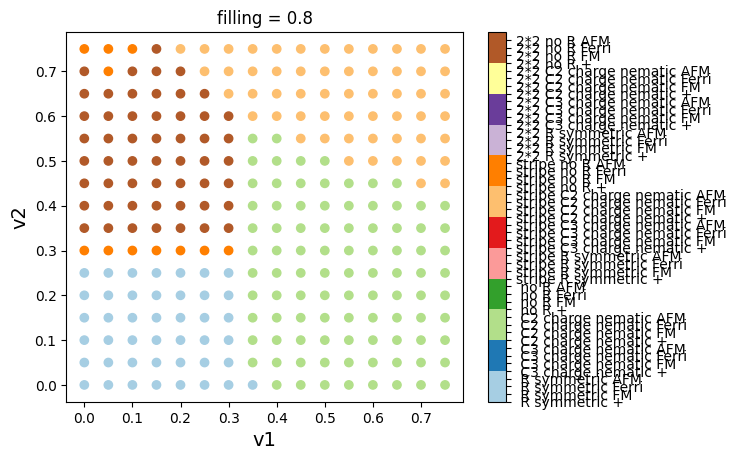

In [17]:
colorbar_ticks_combined = np.arange(len(phase_list_final))
cmap = plt.get_cmap("Paired", len(phase_list_final))
# plt.pcolormesh(e_fermi_mesh, u_mesh, phase_diagram_combined_op.T, cmap="Paired")
plt.scatter(v1_mesh, v2_mesh, c=phase_diagram_based_on_d, cmap=cmap,vmin=0, vmax=len(phase_list_final))
# plt.xlabel(r'$E_{f}$', size = '14')
plt.xlabel('v1', size = '14')
plt.ylabel('v2', size = '14')
# plt.xlim(3.8,6)
colorbar_ticks = np.arange(len(phase_list_final))
cbar = plt.colorbar()
cbar.set_ticks(colorbar_ticks)
cbar.set_ticklabels(phase_list_final)
plt.title('filling = 0.8')

In [18]:
unique_phase_index = np.unique(phase_diagram_based_on_d)
unique_phase_name = [phase_list_final[i] for i in np.int_(unique_phase_index)]
filtered_phase_diagram = np.zeros(phase_diagram_based_on_d.shape)
for i in range(v1_mesh.shape[0]):
    for j in range(v1_mesh.shape[1]):
        filtered_phase_diagram[i,j] = np.where(unique_phase_index==phase_diagram_based_on_d[i,j])[0][0]

Text(0.5, 1.0, 'filling = 0.8')

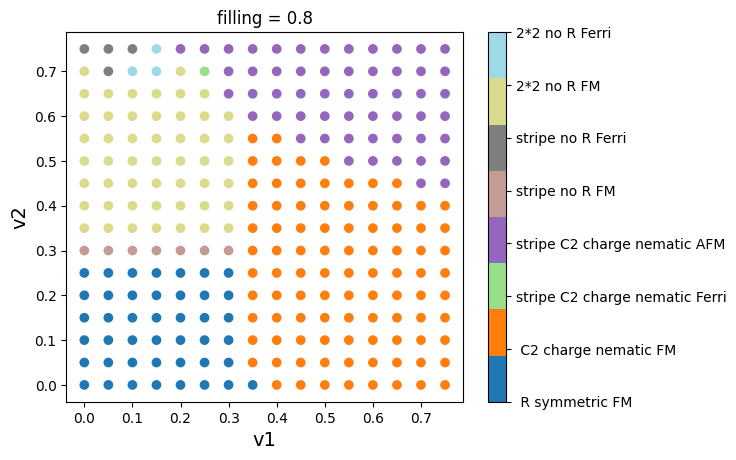

In [19]:
cmap = plt.get_cmap("tab20", len(unique_phase_index))
plt.scatter(v1_mesh, v2_mesh, c=filtered_phase_diagram, cmap=cmap)
plt.xlabel('v1', size = '14')
plt.ylabel('v2', size = '14')
colorbar_ticks = np.arange(len(unique_phase_index))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(unique_phase_index)))
cbar.set_ticklabels(unique_phase_name)
plt.title('filling = 0.8')

In [20]:
sorted_density[6,6,0,0] - sorted_density[6,6,0,1]

array([0.24278159-1.03758312e-19j, 0.27325861-1.97401127e-21j,
       0.2839598 +2.03723462e-19j, 0.2839598 +3.34345492e-19j,
       0.27325861+1.77189095e-19j, 0.24278159-1.25919398e-19j,
       0.2839598 +3.91569303e-20j, 0.27325861+1.82351643e-20j,
       0.24278159+9.65993686e-20j, 0.24278159+2.14987802e-19j,
       0.27325861-1.49175541e-20j, 0.2839598 +1.38730694e-19j])

In [21]:
sorted_density[6,6,0,0] + sorted_density[6,6,0,1]

array([0.24278159-1.03758312e-19j, 0.27325861-1.97401127e-21j,
       0.2839598 +2.03723462e-19j, 0.2839598 +3.34345492e-19j,
       0.27325861+1.77189095e-19j, 0.24278159-1.25919398e-19j,
       0.2839598 +3.91569303e-20j, 0.27325861+1.82351643e-20j,
       0.24278159+9.65993686e-20j, 0.24278159+2.14987802e-19j,
       0.27325861-1.49175541e-20j, 0.2839598 +1.38730694e-19j])

Text(0.5, 1.0, 'filling = 0.8')

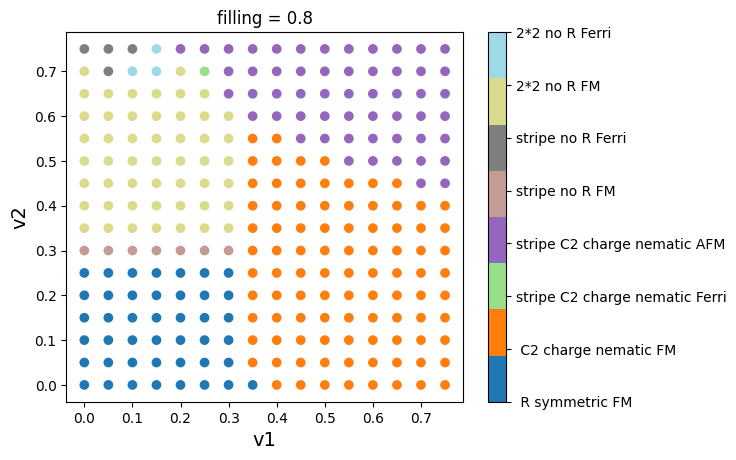

In [22]:
cmap = plt.get_cmap("tab20", len(unique_phase_index))
plt.scatter(v1_mesh, v2_mesh, c=filtered_phase_diagram, cmap=cmap)
plt.xlabel('v1', size = '14')
plt.ylabel('v2', size = '14')
colorbar_ticks = np.arange(len(unique_phase_index))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(unique_phase_index)))
cbar.set_ticklabels(unique_phase_name)
plt.title('filling = 0.8')

In [23]:
sorted_ground_state_e[0,-2]

array([-0.31784464, -0.31784464, -0.31784464, -0.31784464, -0.31784464,
       -0.31784464, -0.31782808, -0.31782808, -0.31744842, -0.31744842,
       -0.31744842, -0.31744842, -0.31528778, -0.30961401, -0.30961401,
       -0.30961401, -0.30961401, -0.2995029 , -0.29950289, -0.26973116])

In [24]:
rot_symm_m_check_d(sorted_density[0,-2,0], c_6_2uc, c_3_2uc, c_2_2uc)

(np.float64(0.6716810798206724),
 np.float64(0.019464209538010535),
 np.float64(0.6738242940565154),
 array([0.03196308-3.53607717e-20j, 0.01921943+1.76670702e-19j,
        0.1846706 -1.10960041e-19j, 0.01922136-6.88553406e-20j,
        0.031964  -3.58977973e-22j, 0.02993327+5.03644801e-20j,
        0.19660841+9.56047377e-19j, 0.19661212-9.70675801e-19j,
        0.02453301+1.04667246e-19j, 0.02037183+9.51761167e-20j,
        0.02036989-9.96187901e-20j, 0.02453299-4.32344969e-20j]))

In [25]:
rot_symm_m_check_d(sorted_density[0,-2,0], c_6_2uc_x, c_3_2uc_x, c_2_2uc_x)

(np.float64(0.544343683518012),
 np.float64(0.6522228168381996),
 np.float64(0.6738242940565154),
 array([0.03196308-3.53607717e-20j, 0.01921943+1.76670702e-19j,
        0.1846706 -1.10960041e-19j, 0.01922136-6.88553406e-20j,
        0.031964  -3.58977973e-22j, 0.02993327+5.03644801e-20j,
        0.19660841+9.56047377e-19j, 0.19661212-9.70675801e-19j,
        0.02453301+1.04667246e-19j, 0.02037183+9.51761167e-20j,
        0.02036989-9.96187901e-20j, 0.02453299-4.32344969e-20j]))

In [26]:
rot_symm_m_check_d(sorted_density[0,-2,0], c_6_2uc_y, c_3_2uc_y, c_2_2uc_y)

(np.float64(0.5292222631590344),
 np.float64(0.6716801465643303),
 np.float64(0.6738242940565154),
 array([0.03196308-3.53607717e-20j, 0.01921943+1.76670702e-19j,
        0.1846706 -1.10960041e-19j, 0.01922136-6.88553406e-20j,
        0.031964  -3.58977973e-22j, 0.02993327+5.03644801e-20j,
        0.19660841+9.56047377e-19j, 0.19661212-9.70675801e-19j,
        0.02453301+1.04667246e-19j, 0.02037183+9.51761167e-20j,
        0.02036989-9.96187901e-20j, 0.02453299-4.32344969e-20j]))

In [27]:
rot_symm_m_check_d(sorted_density[0,-2,0], c_6_2uc_gamma, c_3_2uc_gamma, c_2_2uc_gamma)

(np.float64(0.5292277776689263),
 np.float64(0.6716810798206724),
 np.float64(0.6738242940565154),
 array([0.03196308-3.53607717e-20j, 0.01921943+1.76670702e-19j,
        0.1846706 -1.10960041e-19j, 0.01922136-6.88553406e-20j,
        0.031964  -3.58977973e-22j, 0.02993327+5.03644801e-20j,
        0.19660841+9.56047377e-19j, 0.19661212-9.70675801e-19j,
        0.02453301+1.04667246e-19j, 0.02037183+9.51761167e-20j,
        0.02036989-9.96187901e-20j, 0.02453299-4.32344969e-20j]))

In [28]:
sorted_density[0,1,0,0]+sorted_density[0,1,0,1]

array([0.26666667-5.12455400e-20j, 0.26666667+1.09274891e-19j,
       0.26666667-2.46307863e-21j, 0.26666667+4.06651888e-21j,
       0.26666667-3.23117751e-19j, 0.26666666-2.94908226e-19j,
       0.26666667-1.40386260e-19j, 0.26666666-2.60648388e-19j,
       0.26666666-1.99383859e-19j, 0.26666666-2.88703329e-20j,
       0.26666666-1.94861455e-19j, 0.26666667+1.58541368e-19j])

In [29]:
c_6_2uc_y@(sorted_density[0,1,0,0]+sorted_density[0,1,0,1])

array([0.26666667+1.58541368e-19j, 0.26666667-1.40386260e-19j,
       0.26666666-2.60648388e-19j, 0.26666667-2.46307863e-21j,
       0.26666667+4.06651888e-21j, 0.26666667-3.23117751e-19j,
       0.26666666-1.99383859e-19j, 0.26666666-2.88703329e-20j,
       0.26666666-1.94861455e-19j, 0.26666666-2.94908226e-19j,
       0.26666667-5.12455400e-20j, 0.26666667+1.09274891e-19j])

In [30]:
la.norm(c_6_2uc_y@(sorted_density[0,1,0,0]+sorted_density[0,1,0,1]) - (sorted_density[0,1,0,0]+sorted_density[0,1,0,1]))

np.float64(1.623172069700726e-08)

In [31]:
rot_symm_m_check_d(sorted_density[0,1,0], c_6_2uc_y, c_3_2uc_y, c_2_2uc_y) 

(np.float64(8.101813886440823e-09),
 np.float64(1.2219144140956928e-08),
 np.float64(1.6203594244146302e-08),
 array([0.26666667-5.12455400e-20j, 0.26666667+1.09274891e-19j,
        0.26666667-2.46307863e-21j, 0.26666667+4.06651888e-21j,
        0.26666667-3.23117751e-19j, 0.26666666-2.94908226e-19j,
        0.26666667-1.40386260e-19j, 0.26666666-2.60648388e-19j,
        0.26666666-1.99383859e-19j, 0.26666666-2.88703329e-20j,
        0.26666666-1.94861455e-19j, 0.26666667+1.58541368e-19j]))

In [32]:
rot_symm_m_check_d(sorted_density[0,1,0], c_6_2uc, c_3_2uc, c_2_2uc) 

(np.float64(8.101824044981498e-09),
 np.float64(1.2326911325022394e-08),
 np.float64(1.6203594244146302e-08),
 array([0.26666667-5.12455400e-20j, 0.26666667+1.09274891e-19j,
        0.26666667-2.46307863e-21j, 0.26666667+4.06651888e-21j,
        0.26666667-3.23117751e-19j, 0.26666666-2.94908226e-19j,
        0.26666667-1.40386260e-19j, 0.26666666-2.60648388e-19j,
        0.26666666-1.99383859e-19j, 0.26666666-2.88703329e-20j,
        0.26666666-1.94861455e-19j, 0.26666667+1.58541368e-19j]))

In [33]:
sorted_density[0,1,0,0]-sorted_density[0,1,0,1]

array([0.26666667-5.12455400e-20j, 0.26666667+1.09274891e-19j,
       0.26666667-2.46307863e-21j, 0.26666667+4.06651888e-21j,
       0.26666667-3.23117751e-19j, 0.26666666-2.94908226e-19j,
       0.26666667-1.40386260e-19j, 0.26666666-2.60648388e-19j,
       0.26666666-1.99383859e-19j, 0.26666666-2.88703329e-20j,
       0.26666666-1.94861455e-19j, 0.26666667+1.58541368e-19j])

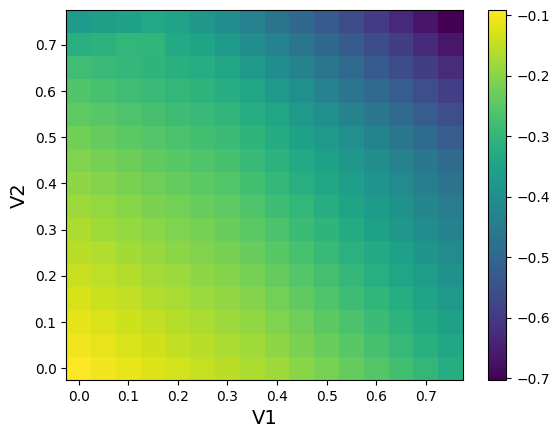

In [34]:
plt.pcolormesh(v1_mesh,v2_mesh,sorted_ground_state_e[:,:,0])
plt.xlabel('V1', size = '14')
plt.ylabel('V2', size = '14')
plt.colorbar()

In [35]:
np.mean(final_iteration)

np.float64(147.9166015625)

In [36]:
np.max(final_iteration)

np.int32(500)

In [37]:
np.min(final_iteration)

np.int32(4)

# try to make a better looking phase diagram

In [38]:
# determine the color
# nematic_phase = [' R symmetric', ' C3 charge nematic', ' C2 charge nematic', ' no R']
# determine the shape
ts_phase = ['', 'stripe', '2*2']
# determine if there would be a ferro magnetic phase
Magnetism_phase = [' +', ' FM', " AFi"]

In [39]:
# color_map = {
#     ' R symmetric':      '#56B4E9',  # light blue
#     ' C3 charge nematic':'#F4A3C0',  # light pink
#     ' C2 charge nematic':'#CC79A7',  # stronger pink
#     ' no R':             '#9AA0A6',  # neutral gray
# }
# cmap = np.array(['#56B4E9', '#F4A3C0', '#CC79A7', '#9AA0A6'])

In [40]:
nematic_measure = np.zeros((v1_mesh.shape), np.float64)
ts_check = np.zeros((v1_mesh.shape), np.int32)
f_phase = np.zeros((v1_mesh.shape), np.int32)
f_measure = np.zeros((v1_mesh.shape), np.float64)
f_max_measure = np.zeros((v1_mesh.shape), np.float64)

threshold = 1E-2
for i in range(v1_mesh.shape[0]):
    for j in range(v1_mesh.shape[1]):
        d_ij = sorted_density[i,j,0]
        ts_diff_arr = translation_check_d(d_ij, translation_a1, translation_a2, translation_a3)
        if np.all(ts_diff_arr<threshold):
            ts_check[i,j] = 0
        elif np.all(ts_diff_arr>threshold):
            ts_check[i,j] = 2
        else:
            ts_check[i,j] = 1
        # if ts_check[i,j]==0:
        #     d_ij = d_ij[:,:3]
        #     c6_diff, c3_diff, c2_diff, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_uc, c_3_uc, c_2_uc)
        # else:
        c6_diff_o, c3_diff_o, c2_diff_o, magnetism_arr = rot_symm_m_check_d(d_ij, c_6_2uc, c_3_2uc, c_2_2uc)
        c6_diff_x, c3_diff_x, c2_diff_x, _ = rot_symm_m_check_d(d_ij, c_6_2uc_x, c_3_2uc_x, c_2_2uc_x)
        c6_diff_y, c3_diff_y, c2_diff_y, _ = rot_symm_m_check_d(d_ij, c_6_2uc_y, c_3_2uc_y, c_2_2uc_y)    
        c6_diff_gamma, c3_diff_gamma, c2_diff_gamma, _ = rot_symm_m_check_d(d_ij, c_6_2uc_gamma, c_3_2uc_gamma, c_2_2uc_gamma)
        c6_diff = np.min(np.abs(np.array([c6_diff_o, c6_diff_x, c6_diff_y, c6_diff_gamma])))
        nematic_measure[i,j] = c6_diff
        if np.max(np.abs(magnetism_arr)) > threshold:
            if np.all(magnetism_arr > threshold) or np.all(magnetism_arr < -threshold):
                f_phase[i,j] = 1
            else:
                f_phase[i,j] = 2
        else:
            f_phase[i,j] = 0
        f_measure[i,j] = np.mean(np.abs(magnetism_arr))
        f_max_measure[i,j] = np.max(np.abs(magnetism_arr))

In [41]:
from matplotlib.path import Path
from matplotlib.colors import TwoSlopeNorm

def rect_marker(w=1.8, h=0.8):
    w2, h2 = w/2, h/2
    verts = [(-w2,-h2), (w2,-h2), (w2,h2), (-w2,h2), (-w2,-h2)]
    codes = [Path.MOVETO] + [Path.LINETO]*3 + [Path.CLOSEPOLY]
    return Path(verts, codes)

In [42]:
# from matplotlib.colors import ListedColormap, BoundaryNorm

# tab20 = plt.get_cmap("tab20").colors
# corlor_index = [1,-8,2,-6]
# # color_list = [tab20[i] for i in corlor_index]
# color_list = ['#56B4E9', '#CC79A7', '#F4A3C0', '#9AA0A6']
# # cmap = ListedColormap(color_list)
# # norm  = BoundaryNorm(np.arange(-0.5, cmap.N+0.5), cmap.N)

# shape_list = ['o', rect_marker(), 'P']

In [43]:
mask_1_1 = (ts_check==0)
mask_1_2 = (ts_check==1)
mask_2_2 = (ts_check==2)
# mask_symm = (f_phase==0)
# mask_nematic = (f_phase==2)

# mask_symm_1_1 = (mask_1_1 & mask_symm)
# mask_symm_1_2 = (mask_1_2 & mask_symm)
# mask_symm_2_2 = (mask_2_2 & mask_symm)
# mask_nematic_1_1 = (mask_1_1 & mask_nematic)
# mask_nematic_1_2 = (mask_1_2 & mask_nematic)
# mask_nematic_2_2 = (mask_2_2 & mask_nematic)

In [44]:
from matplotlib import colors as mcolors

# vmin = threshold
# vmax = np.max(nematic_measure)
# cmap_base = plt.get_cmap('cool')
# cmap = cmap_base.with_extremes(under='#A6CEE3')
# norm = mcolors.Normalize(vmin=threshold, vmax=vmax)
def truncated_cmap(name='viridis', lo=0.22, hi=0.90, N=256, under='#A6CEE3'):
    """Return a ListedColormap that is the lo..hi slice of `name`.
       `under` is used for values < vmin (your symmetric mask)."""
    base = plt.get_cmap(name)
    new = mcolors.ListedColormap(base(np.linspace(lo, hi, N)), name=f'{name}_trunc')
    if under is not None:
        new = new.with_extremes(under=under)
    return new

phi   = nematic_measure
thr   = 1e-2

# symmetric vs. excess
excess = np.clip(phi - thr, 0, None)           # 0 for symmetric, grows above thr
hi     = np.percentile(excess[excess>0], 95)       # robust vmax; fallback if empty
if not np.isfinite(hi) or hi==0:
    hi = excess.max() if np.isfinite(excess.max()) else 1.0

cmap = truncated_cmap('plasma', lo=0.25, hi=0.95, under='#A6CEE3')  # symmetric color
norm = mcolors.Normalize(vmin=threshold, vmax=hi)

In [45]:
def alpha_from_m(m_avg, amin=0.35, amax=0.95, lo_pct=5, hi_pct=95):
    """Map m_avg → [amin, amax] with percentile clipping."""
    m = np.asarray(m_avg, float)
    lo, hi = np.nanpercentile(m, [lo_pct, hi_pct]) if m.size else (0.0, 1.0)
    if not np.isfinite(lo) or not np.isfinite(hi) or lo == hi:
        lo, hi = np.nanmin(m), np.nanmax(m)
        if lo == hi: lo, hi = 0.0, 1.0
    t = np.clip((m - lo) / (hi - lo), 0, 1)
    return amin + t * (amax - amin)

In [46]:
alpha_input = alpha_from_m(f_max_measure)

In [47]:
from matplotlib.patches import FancyArrowPatch


def add_tilted_arrow(ax, x, y, angle_deg=35, length=0.12,
                     lw=2.0, color='k', center=True, offset=(0.0, 0.0),
                     style='->', alpha=1.0, mutation_scale=8, z=6):
    """
    Draw a single tilted arrow at (x,y).
    - If center=True, the arrow runs across the point: start at (x - dx/2, y - dy/2) → (x + dx/2, y + dy/2)
      (so it "cuts through" the circle like your left sketch).
    - offset: small (dx_off, dy_off) added to both start and end to shift the arrow slightly, e.g. to de-overlap.
    """
    th = np.deg2rad(angle_deg)
    dx = length * np.cos(th)
    dy = length * np.sin(th)
    if center:
        x0, y0 = x - dx/2 + offset[0], y - dy/2 + offset[1]
        x1, y1 = x + dx/2 + offset[0], y + dy/2 + offset[1]
    else:
        x0, y0 = x + offset[0], y + offset[1]
        x1, y1 = x + dx + offset[0], y + dy + offset[1]

    a = FancyArrowPatch((x0, y0), (x1, y1),
                        arrowstyle=style, mutation_scale=mutation_scale,
                        linewidth=lw, color=color, facecolor=color, alpha=alpha,
                        zorder=z)
    ax.add_patch(a)


def add_afm_pair(ax, x, y, angle_deg=35, length=0.12,
                 sep=0.010, lw=2.0, color='k',
                 style='->', alpha=1.0, mutation_scale=8, z=6):
    """
    Draw two opposite arrows (AFM/Ferri) parallel to each other with a small perpendicular separation 'sep'.
    """
    th = np.deg2rad(angle_deg)
    # perpendicular (unit) vector for the small offset
    ux, uy = np.cos(th), np.sin(th)
    px, py = -uy, ux     # rotate by +90°
    # shift both arrows by ±sep/2 along the perpendicular
    add_tilted_arrow(ax, x, y, angle_deg=angle_deg, length=length,
                     lw=lw, color=color, center=True,
                     offset=(+px*sep/2, +py*sep/2),
                     style=style, alpha=alpha, mutation_scale=mutation_scale, z=z)
    # opposite arrow: same line but reversed direction
    add_tilted_arrow(ax, x, y, angle_deg=angle_deg+180.0, length=length,
                     lw=lw, color=color, center=True,
                     offset=(-px*sep/2, -py*sep/2),
                     style=style, alpha=alpha, mutation_scale=mutation_scale, z=z)

/var/folders/bm/63gh05_j2hl8szc4kw6kzqm00000gn/T/ipykernel_17776/1171245920.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  a = FancyArrowPatch((x0, y0), (x1, y1),


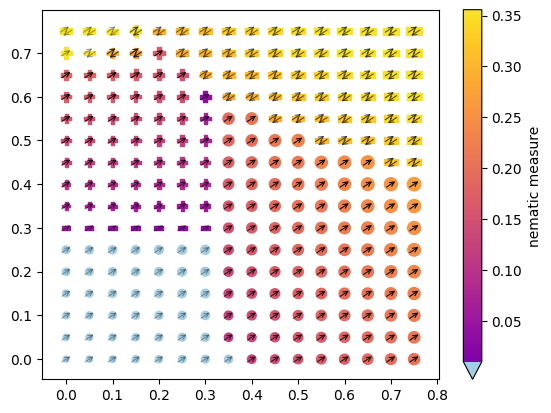

In [48]:
color = 'black'
angle_deg=35
arrow_lw=0.8
arrow_length=0.035

fig,ax = plt.subplots()
# ax.scatter(v1_mesh[mask_symm_1_1], v2_mesh[mask_symm_1_1], s=np.abs(sorted_ground_state_e[:,:,0])[mask_symm_1_1]*200,c='#A6CEE3',marker = 'o')
# ax.scatter(v1_mesh[mask_symm_1_2], v2_mesh[mask_symm_1_2], s=np.abs(sorted_ground_state_e[:,:,0])[mask_symm_1_2]*200,c='#A6CEE3', marker = rect_marker())
# ax.scatter(v1_mesh[mask_symm_2_2], v2_mesh[mask_symm_2_2], s=np.abs(sorted_ground_state_e[:,:,0])[mask_symm_2_2]*200,c='#A6CEE3', marker = 'P')
sc=ax.scatter(v1_mesh[mask_1_1], v2_mesh[mask_1_1], s=np.abs(sorted_ground_state_e[:,:,0])[mask_1_1]*200,c=nematic_measure[mask_1_1], cmap=cmap, norm=norm, marker = 'o')
ax.scatter(v1_mesh[mask_1_2], v2_mesh[mask_1_2], s=np.abs(sorted_ground_state_e[:,:,0])[mask_1_2]*200,c=nematic_measure[mask_1_2], cmap=cmap, norm=norm, marker = rect_marker())
ax.scatter(v1_mesh[mask_2_2], v2_mesh[mask_2_2], s=np.abs(sorted_ground_state_e[:,:,0])[mask_2_2]*200,c=nematic_measure[mask_2_2], cmap=cmap, norm=norm, marker = 'P')
cb = plt.colorbar(sc, extend='min')
cb.set_label('nematic measure')


for i in range(v1_mesh.shape[0]):
    for j in range(v1_mesh.shape[1]):
        if f_phase[i,j]==1:
            add_tilted_arrow(ax, v1_mesh[i,j], v2_mesh[i,j], angle_deg=angle_deg, length=arrow_length,
                         lw=arrow_lw, color='k', center=True, alpha=alpha_input[i,j], z=6)
        elif f_phase[i,j]==2:
            add_afm_pair(ax, v1_mesh[i,j], v2_mesh[i,j], angle_deg=angle_deg, length=arrow_length,
                    sep=0.01, lw=arrow_lw, color='k', alpha=alpha_input[i,j], z=6)

plt.show()


## Arrows are intuitive, but kind of blocking the shape and size of the markers... Let's see if te edge colors could help in strengthening it.

In [49]:
def thickness_pts_from_m(m, M_MIN=0.0, M_MAX=1.0, T_MIN=0.0, T_MAX=5, THRESHOLD=1e-2):
    m = np.asarray(m, float)
    # linear map on a fixed interval, then hard cutoff
    t = (m - M_MIN) / (M_MAX - M_MIN) if M_MAX > M_MIN else 0.0
    t = np.clip(t, 0.0, 1.0)
    thick = T_MIN + t * (T_MAX - T_MIN)
    thick = np.where(m >= THRESHOLD, thick, 0.0)   # no edge below cutoff
    return thick

In [50]:
def outer_size_from_fill_and_thickness(s_fill, thick_pts):
    """
    s_fill: base marker area in pt^2 (your normal 's')
    thick_pts: outward thickness you want in *points*
    Returns s_outer (pt^2) such that the outer marker grows outwards by 'thick_pts'.
    (Exact for circles; good visual approximation for other markers.)
    """
    r_fill = np.sqrt(np.asarray(s_fill, float) / np.pi)   # radius in *points*
    r_outer = r_fill + np.asarray(thick_pts, float)
    s_outer = np.pi * r_outer**2
    return s_outer

In [51]:
edge_palette = {                         # edge color by magnetic class
    'FM':         '#222222',             # near-black
    # 'Ferri/AFM':  '#0B4FA3',  
    'Ferri/AFM':  '#8B4513'  
    # 'Ferri/AFM': '#3E2723'         # Okabe–Ito orange
}
lw_range_pts = (0.8, 2.8)                # marker edge thickness range (points)

In [52]:
N = v1_mesh.shape
thr = 1e-2

lw_range_pts = (0.8, 2.8)                # marker edge thickness range (points)

is_fm       = (f_phase == 1)
is_ferri_af = (f_phase == 2)

edgecolors = np.full(N, 'none', dtype=object)       # default: no edge
edgecolors[is_fm]       = edge_palette['FM']
edgecolors[is_ferri_af] = edge_palette['Ferri/AFM']

# line width scales with m, but cut off completely below threshold
lw = np.zeros(N, float)
thick = thickness_pts_from_m(f_max_measure)
s_outer = outer_size_from_fill_and_thickness(np.abs(sorted_ground_state_e[:,:,0])*300, thick)
s_inner = outer_size_from_fill_and_thickness(np.abs(sorted_ground_state_e[:,:,0])*300, 0)
bg = '#FFFFFF'


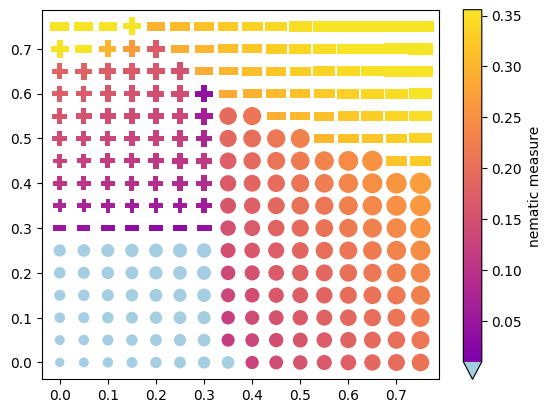

In [53]:
fig,ax = plt.subplots()
# ax.scatter(v1_mesh[mask_symm_1_1], v2_mesh[mask_symm_1_1], s=np.abs(sorted_ground_state_e[:,:,0])[mask_symm_1_1]*200,c='#A6CEE3',marker = 'o')
# ax.scatter(v1_mesh[mask_symm_1_2], v2_mesh[mask_symm_1_2], s=np.abs(sorted_ground_state_e[:,:,0])[mask_symm_1_2]*200,c='#A6CEE3', marker = rect_marker())
# ax.scatter(v1_mesh[mask_symm_2_2], v2_mesh[mask_symm_2_2], s=np.abs(sorted_ground_state_e[:,:,0])[mask_symm_2_2]*200,c='#A6CEE3', marker = 'P')
sc=ax.scatter(v1_mesh[mask_1_1], v2_mesh[mask_1_1], s=np.abs(sorted_ground_state_e[:,:,0])[mask_1_1]*500,c=nematic_measure[mask_1_1], cmap=cmap, norm=norm, marker = 'o', edgecolors=edgecolors[mask_1_1], linewidths=lw[mask_1_1])
ax.scatter(v1_mesh[mask_1_2], v2_mesh[mask_1_2], s=np.abs(sorted_ground_state_e[:,:,0])[mask_1_2]*500,c=nematic_measure[mask_1_2], cmap=cmap, norm=norm, marker = rect_marker(), edgecolors=edgecolors[mask_1_2], linewidths=lw[mask_1_2])
ax.scatter(v1_mesh[mask_2_2], v2_mesh[mask_2_2], s=np.abs(sorted_ground_state_e[:,:,0])[mask_2_2]*500,c=nematic_measure[mask_2_2], cmap=cmap, norm=norm, marker = 'P', edgecolors=edgecolors[mask_2_2], linewidths=lw[mask_2_2])
cb = plt.colorbar(sc, extend='min')
cb.set_label('nematic measure')

In [54]:
bg

'#FFFFFF'

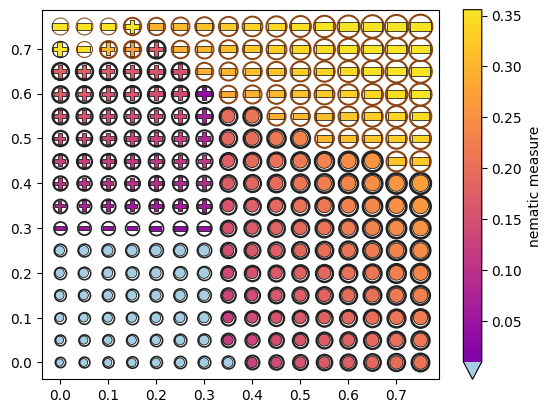

In [55]:
fig,ax = plt.subplots()
for i in range(v1_mesh.shape[0]):
    for j in range(v1_mesh.shape[1]):
        ax.scatter(v1_mesh[i,j], v2_mesh[i,j], s=s_outer[i,j],c=edgecolors[i,j], marker = 'o')
        ax.scatter(v1_mesh[i,j], v2_mesh[i,j], s=s_inner[i,j],c=bg, marker = 'o')
sc=ax.scatter(v1_mesh[mask_1_1], v2_mesh[mask_1_1], s=np.abs(sorted_ground_state_e[:,:,0])[mask_1_1]*300,c=nematic_measure[mask_1_1], cmap=cmap, norm=norm, edgecolors='black', linewidths=0.5, marker = 'o')
ax.scatter(v1_mesh[mask_1_2], v2_mesh[mask_1_2], s=np.abs(sorted_ground_state_e[:,:,0])[mask_1_2]*300,c=nematic_measure[mask_1_2], cmap=cmap, norm=norm, edgecolors='black', linewidths=0.5, marker = rect_marker())
ax.scatter(v1_mesh[mask_2_2], v2_mesh[mask_2_2], s=np.abs(sorted_ground_state_e[:,:,0])[mask_2_2]*300,c=nematic_measure[mask_2_2], cmap=cmap, norm=norm, edgecolors='black', linewidths=0.5, marker = 'P')
cb = plt.colorbar(sc, extend='min')
cb.set_label('nematic measure')

In [56]:
f_max_measure[7,1], nematic_measure[7,1], sorted_ground_state_e[7,1,0]

(np.float64(0.34490680118895317),
 np.float64(0.11736028667375004),
 np.float64(-0.1791740530009111))

In [57]:
f_max_measure[7,0], nematic_measure[7,0], sorted_ground_state_e[7,0,0]

(np.float64(0.26788979846813976),
 np.float64(0.0036693955045251636),
 np.float64(-0.1659655256518497))

In [58]:
f_max_measure[6,1], nematic_measure[6,1], sorted_ground_state_e[6,1,0]

(np.float64(0.2672704934488316),
 np.float64(0.0018114691780430903),
 np.float64(-0.16784043224883588))

In [59]:
np.max(np.abs(sorted_ground_state_e[:,:,0]))

np.float64(0.7025949498553057)

In [60]:
np.max(np.abs(f_max_measure))

np.float64(0.4465677344339508)

In [61]:
np.max(np.abs(f_measure))

np.float64(0.266666666749892)

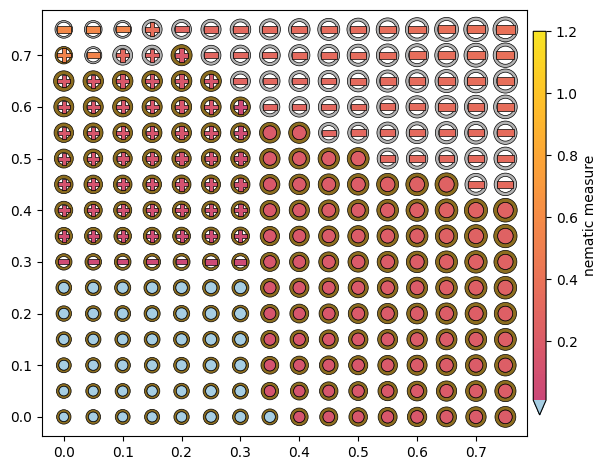

In [62]:
from functions_parameters.phase_plot import PlotConfig, plot_phase_map

CFG = PlotConfig()
fig, ax = plt.subplots()
plot_phase_map(
    fig,
    ax,
    v1_mesh, v2_mesh,
    sorted_ground_state_e,               # [...,0] read inside
    nematic_measure,
    ts_check, f_phase,
    f_max_measure,                       # or f_measure if you prefer mean
    cfg=CFG,
)
plt.tight_layout(); plt.show()

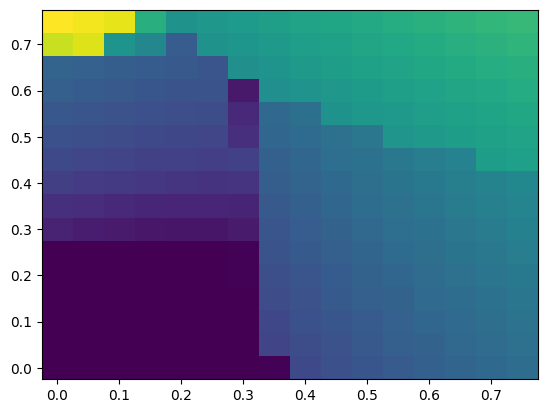

In [63]:
plt.pcolormesh(v1_mesh,v2_mesh,nematic_measure)